In [135]:
import cv2
import json
from matplotlib import pyplot as plt

In [165]:
BASE_PATH="/home/shiv/Documents/plants_try/data/camera_images"
DATE_DIR="20221010_234058"
image_number='1'

raw_image_path=f"{BASE_PATH}/{DATE_DIR}/raw/{image_number}.jpg"
raw_image_path=f"{BASE_PATH}/{DATE_DIR}/cv2/{image_number}.png"
seg_image_path=f"{BASE_PATH}/{DATE_DIR}/raw/{image_number}.jpg"
objects_path=f"{BASE_PATH}/{DATE_DIR}/rec_objects/{image_number}.json"


In [166]:
raw_image_path

'/home/shiv/Documents/plants_try/data/camera_images/20221010_234058/cv2/1.png'

In [167]:
image_s = cv2.imread(raw_image_path)
image_r = cv2.rotate(image_s, cv2.ROTATE_180)
image = cv2.flip(image_r, 1)
image=image_s
image.shape

(720, 720, 3)

In [172]:
object_to_pick=1
with open(objects_path, 'r') as file:
    file_content=file.read()
rec_objs=json.loads(file_content)
rec_objs['recognized_objects'][object_to_pick]

{'id': 413,
 'position': [3.847891732218571, 0.9950025278688868, 0.3306467750698657],
 'orientation': [0.0007430874829971824,
  -1.8621643505860364e-05,
  0.9999997237370754,
  3.1365430791231605],
 'size': [0.6000000000000001, 0.6000000000000001],
 'position_on_image': [184, 299],
 'size_on_image': [130, 249],
 'number_of_colors': 1,
 'colors': [0.0, 1.0, 0.0],
 'model': "b'potted tree'"}

In [174]:
size = (rec_objs['recognized_objects'][object_to_pick]['size_on_image'][0], 
         rec_objs['recognized_objects'][object_to_pick]['size_on_image'][1])
start = (rec_objs['recognized_objects'][object_to_pick]['position_on_image'][0], 
         rec_objs['recognized_objects'][object_to_pick]['position_on_image'][1])
end = (start[0]+size[0], start[1]+size[1])

In [175]:
image_m = cv2.rectangle(image, start, end, (0,0,255), 2)

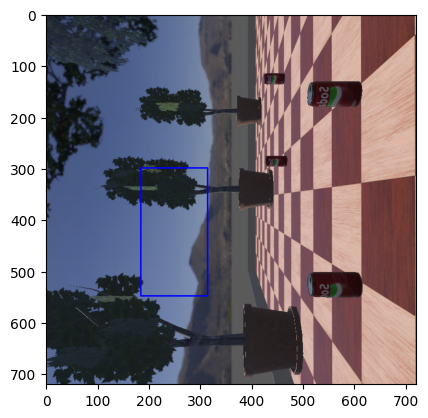

In [176]:
plt.imshow(image_m)

In [177]:
for obj in rec_objs['recognized_objects']:
    size = (obj['size_on_image'][0], obj['size_on_image'][1])
    start = (obj['position_on_image'][0], obj['position_on_image'][1])
    end = (start[0]+size[0], start[1]+size[1])
    image = cv2.rectangle(image, start, end, (0,0,255), 2)

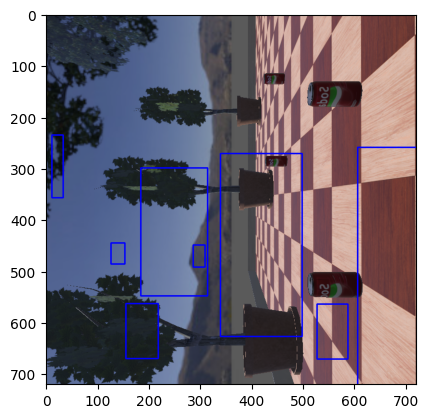

In [178]:
plt.imshow(image_m)

In [163]:
type(image_m)

numpy.ndarray

In [162]:
cv2.imwrite('test.png', image_m)

True